In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
#df.head()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[[ 'koi_fpflag_co',  'koi_fpflag_nt',  'koi_fpflag_ss',  'koi_model_snr',  'koi_prad',  'koi_duration_err2',  'koi_prad_err2',  'koi_duration_err1',  'koi_steff_err1',  'koi_fpflag_ec',  'koi_prad_err1',  'koi_steff_err2',  'koi_time0bk_err2',  'koi_period',  'koi_time0bk_err1',  'koi_duration',  'koi_period_err1',  'koi_depth',  'koi_period_err2',  'koi_impact',  'koi_insol_err1',  'koi_insol',  'koi_teq',  'koi_insol_err2',  'koi_time0bk']]
selected_features

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_duration_err2,koi_prad_err2,koi_duration_err1,koi_steff_err1,koi_fpflag_ec,...,koi_duration,koi_period_err1,koi_depth,koi_period_err2,koi_impact,koi_insol_err1,koi_insol,koi_teq,koi_insol_err2,koi_time0bk
0,0,0,0,25.8,2.83,-0.11600,-0.19,0.11600,81,0,...,4.50700,2.479000e-04,874.8,-2.479000e-04,0.586,2.87,9.11,443,-1.62,162.513840
1,0,0,1,76.3,14.60,-0.03410,-1.31,0.03410,158,0,...,1.78220,1.490000e-05,10829.0,-1.490000e-05,0.969,31.04,39.30,638,-10.49,175.850252
2,0,0,1,505.6,33.46,-0.00537,-2.83,0.00537,157,0,...,2.40641,2.630000e-07,8079.2,-2.630000e-07,1.276,668.95,891.96,1395,-230.35,170.307565
3,0,0,0,40.9,2.75,-0.04200,-0.35,0.04200,169,0,...,1.65450,3.760000e-06,603.3,-3.760000e-06,0.701,874.33,926.16,1406,-314.24,171.595550
4,0,0,0,40.2,2.77,-0.06730,-0.30,0.06730,189,0,...,3.14020,1.050000e-05,686.0,-1.050000e-05,0.762,420.33,427.65,1160,-136.70,172.979370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,8.4,1.11,-0.63400,-0.23,0.63400,169,1,...,4.80600,1.846000e-04,87.7,-1.846000e-04,0.765,152.77,176.40,929,-77.60,132.016100
6987,1,0,1,453.3,29.35,-0.01740,-2.57,0.01740,139,0,...,3.22210,1.160000e-07,1579.2,-1.160000e-07,1.252,3406.38,4500.53,2088,-1175.26,131.705093
6988,0,0,0,10.6,0.72,-0.22900,-0.08,0.22900,165,0,...,3.11400,1.780000e-05,48.5,-1.780000e-05,0.043,1537.86,1585.81,1608,-502.22,133.001270
6989,1,0,0,12.3,1.07,-0.16200,-0.11,0.16200,193,0,...,0.86500,2.430000e-06,103.6,-2.430000e-06,0.147,5675.74,5713.41,2218,-1836.94,132.181750


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
disposition = df["koi_disposition"]
disposition_names = ["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, disposition, random_state=42)

In [6]:
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_duration_err2,koi_prad_err2,koi_duration_err1,koi_steff_err1,koi_fpflag_ec,...,koi_duration,koi_period_err1,koi_depth,koi_period_err2,koi_impact,koi_insol_err1,koi_insol,koi_teq,koi_insol_err2,koi_time0bk
6122,0,0,0,10.8,1.24,-0.3060,-0.23,0.3060,154,0,...,3.61600,7.380000e-05,123.1,-7.380000e-05,0.150,204.89,253.30,1017,-103.87,133.077240
6370,0,0,1,13.8,0.86,-0.2820,-0.06,0.2820,158,1,...,2.30900,6.060000e-06,114.6,-6.060000e-06,0.291,2253.61,2891.64,1867,-677.78,132.020050
2879,0,1,0,254.3,3.21,0.0000,-0.32,0.0000,151,0,...,79.89690,6.540000e-05,641.1,-6.540000e-05,0.970,195.16,226.81,989,-64.34,134.460380
107,0,0,0,38.4,2.25,-0.0595,-0.14,0.0595,76,0,...,2.63120,1.910000e-05,875.4,-1.910000e-05,0.300,7.15,55.37,696,-10.12,174.662240
29,0,0,0,696.5,12.21,-0.0075,-1.46,0.0075,77,0,...,2.22739,5.150000e-07,9802.0,-5.150000e-07,0.831,146.52,349.40,1103,-93.21,172.258529


k: 1, Train/Test Score: 1.000/0.592
k: 3, Train/Test Score: 0.781/0.609
k: 5, Train/Test Score: 0.742/0.627
k: 7, Train/Test Score: 0.726/0.638
k: 9, Train/Test Score: 0.719/0.633
k: 11, Train/Test Score: 0.708/0.629
k: 13, Train/Test Score: 0.704/0.631
k: 15, Train/Test Score: 0.700/0.638
k: 17, Train/Test Score: 0.698/0.647
k: 19, Train/Test Score: 0.698/0.642
k: 21, Train/Test Score: 0.692/0.639
k: 23, Train/Test Score: 0.693/0.638
k: 25, Train/Test Score: 0.684/0.634
k: 27, Train/Test Score: 0.682/0.640
k: 29, Train/Test Score: 0.681/0.636
k: 31, Train/Test Score: 0.678/0.638
k: 33, Train/Test Score: 0.676/0.645
k: 35, Train/Test Score: 0.674/0.645
k: 37, Train/Test Score: 0.671/0.640
k: 39, Train/Test Score: 0.673/0.641
k: 41, Train/Test Score: 0.672/0.638
k: 43, Train/Test Score: 0.672/0.637
k: 45, Train/Test Score: 0.671/0.630
k: 47, Train/Test Score: 0.667/0.634
k: 49, Train/Test Score: 0.664/0.636


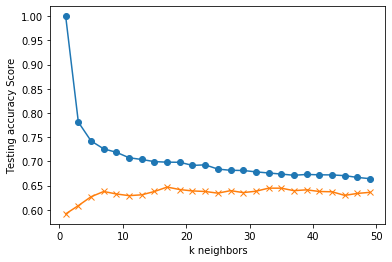

In [7]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.790
